# 모듈 실행

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import plotly.express as px
from glob import glob

%config InlineBackend.figure_format = 'retina'

## 한글 작업 확인

<AxesSubplot: title={'center': '한글'}>

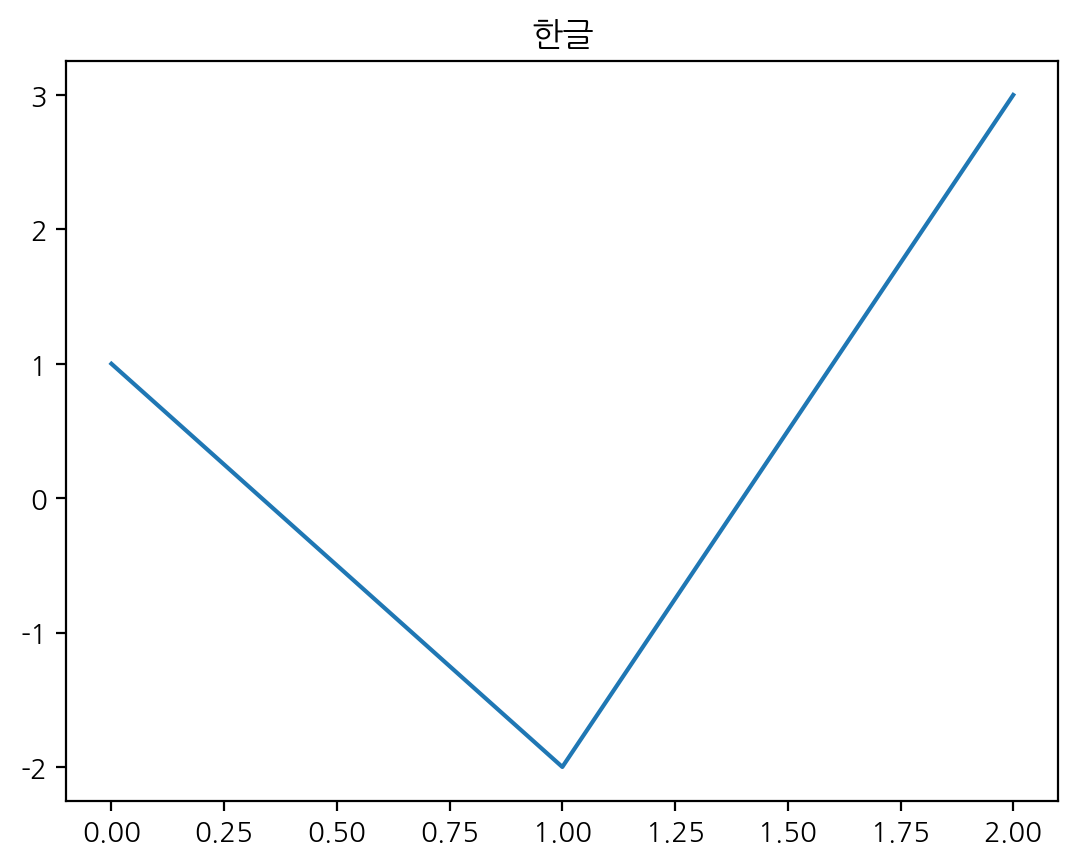

In [5]:
pd.Series([1, -2, 3]).plot(title = "한글")

# 데이터 불러오기 & EDA

In [6]:
df = pd.read_csv("kosis_data_mini2_age.csv", encoding="cp949")
df.head()

,성별(1),특성별(1),특성별(2),항목,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,전체,연령별1,19-29세,분율 (%),90.5,85.3,87.6,89.4,89.0,91.6,88.4,88.0,89.3,89.2,89.2,89.3,87.6,89.8,87.7
1,전체,연령별1,30-39세,분율 (%),86.1,82.7,84.0,83.3,87.1,86.5,81.5,84.7,83.8,83.2,85.8,87.0,86.3,85.8,85.9
2,전체,연령별1,40-49세,분율 (%),82.0,79.1,81.1,82.0,83.4,80.6,81.5,79.0,82.7,82.9,82.4,85.3,84.5,82.6,81.3
3,전체,연령별1,50-59세,분율 (%),73.8,71.8,70.6,70.8,74.9,74.4,73.1,73.6,71.0,74.3,76.5,75.3,75.0,73.0,74.7
4,전체,연령별1,60-69세,분율 (%),58.2,53.8,58.4,58.9,60.7,65.6,60.7,60.5,60.5,64.0,63.1,67.3,67.1,66.8,61.6


In [7]:
df = df.drop(columns = ["특성별(1)", "항목"])

In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별(1)   18 non-null     object 
 1   특성별(2)  18 non-null     object 
 2   2005    18 non-null     float64
 3   2007    18 non-null     float64
 4   2008    18 non-null     float64
 5   2009    18 non-null     float64
 6   2010    18 non-null     float64
 7   2011    18 non-null     float64
 8   2012    18 non-null     float64
 9   2013    18 non-null     float64
 10  2014    18 non-null     float64
 11  2015    18 non-null     float64
 12  2016    18 non-null     float64
 13  2017    18 non-null     float64
 14  2018    18 non-null     float64
 15  2019    18 non-null     float64
 16  2020    18 non-null     float64
dtypes: float64(15), object(2)
memory usage: 2.5+ KB


(18, 17)

In [9]:
df.describe()

,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,72.522222,68.977778,70.527778,71.105556,73.238889,73.861111,72.283333,71.577778,73.072222,73.422222,73.800000,74.833333,74.644444,73.816667,72.427778
std,18.650928,19.373285,19.092124,19.351044,18.746894,18.765680,17.101849,18.563042,16.416090,17.144183,17.779532,17.812058,16.576320,17.660466,17.852230
min,33.600000,25.100000,29.000000,26.700000,29.300000,28.500000,31.600000,27.000000,38.100000,29.100000,30.300000,29.700000,32.200000,30.000000,29.100000
25%,59.225000,59.175000,58.750000,59.150000,62.475000,63.125000,62.950000,61.850000,62.625000,66.600000,64.850000,66.850000,66.875000,64.925000,62.725000
50%,76.950000,72.500000,75.500000,76.050000,78.250000,79.850000,75.300000,78.200000,76.200000,76.700000,77.550000,81.250000,81.050000,80.300000,77.350000
75%,87.075000,83.975000,84.000000,84.950000,86.475000,86.800000,86.125000,84.650000,85.600000,83.425000,85.725000,87.825000,86.075000,86.925000,85.850000
max,93.400000,91.800000,92.800000,93.100000,96.700000,95.300000,90.300000,91.900000,92.100000,94.400000,93.400000,92.100000,90.600000,92.100000,91.600000


# 데이터 정렬 & 시각화

In [11]:
df_me = pd.melt(df, id_vars = ["성별(1)", "특성별(2)"], value_vars = df.columns[2:])
df_me.columns = ["성별", "연령대", "년도", "음주율"]
df_me.head()

,성별,연령대,년도,음주율
0,전체,19-29세,2005,90.5
1,전체,30-39세,2005,86.1
2,전체,40-49세,2005,82.0
3,전체,50-59세,2005,73.8
4,전체,60-69세,2005,58.2


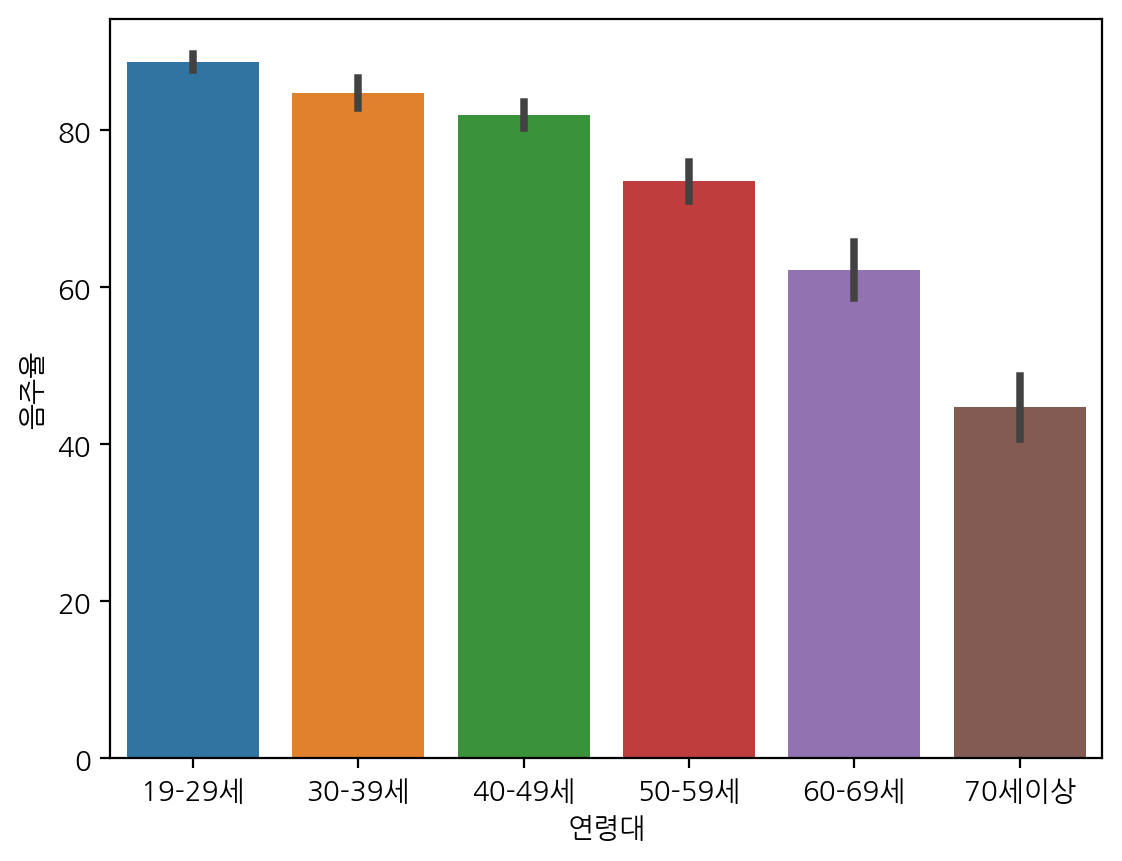

In [12]:
sns.barplot(data = df_me, x = "연령대", y = "음주율");

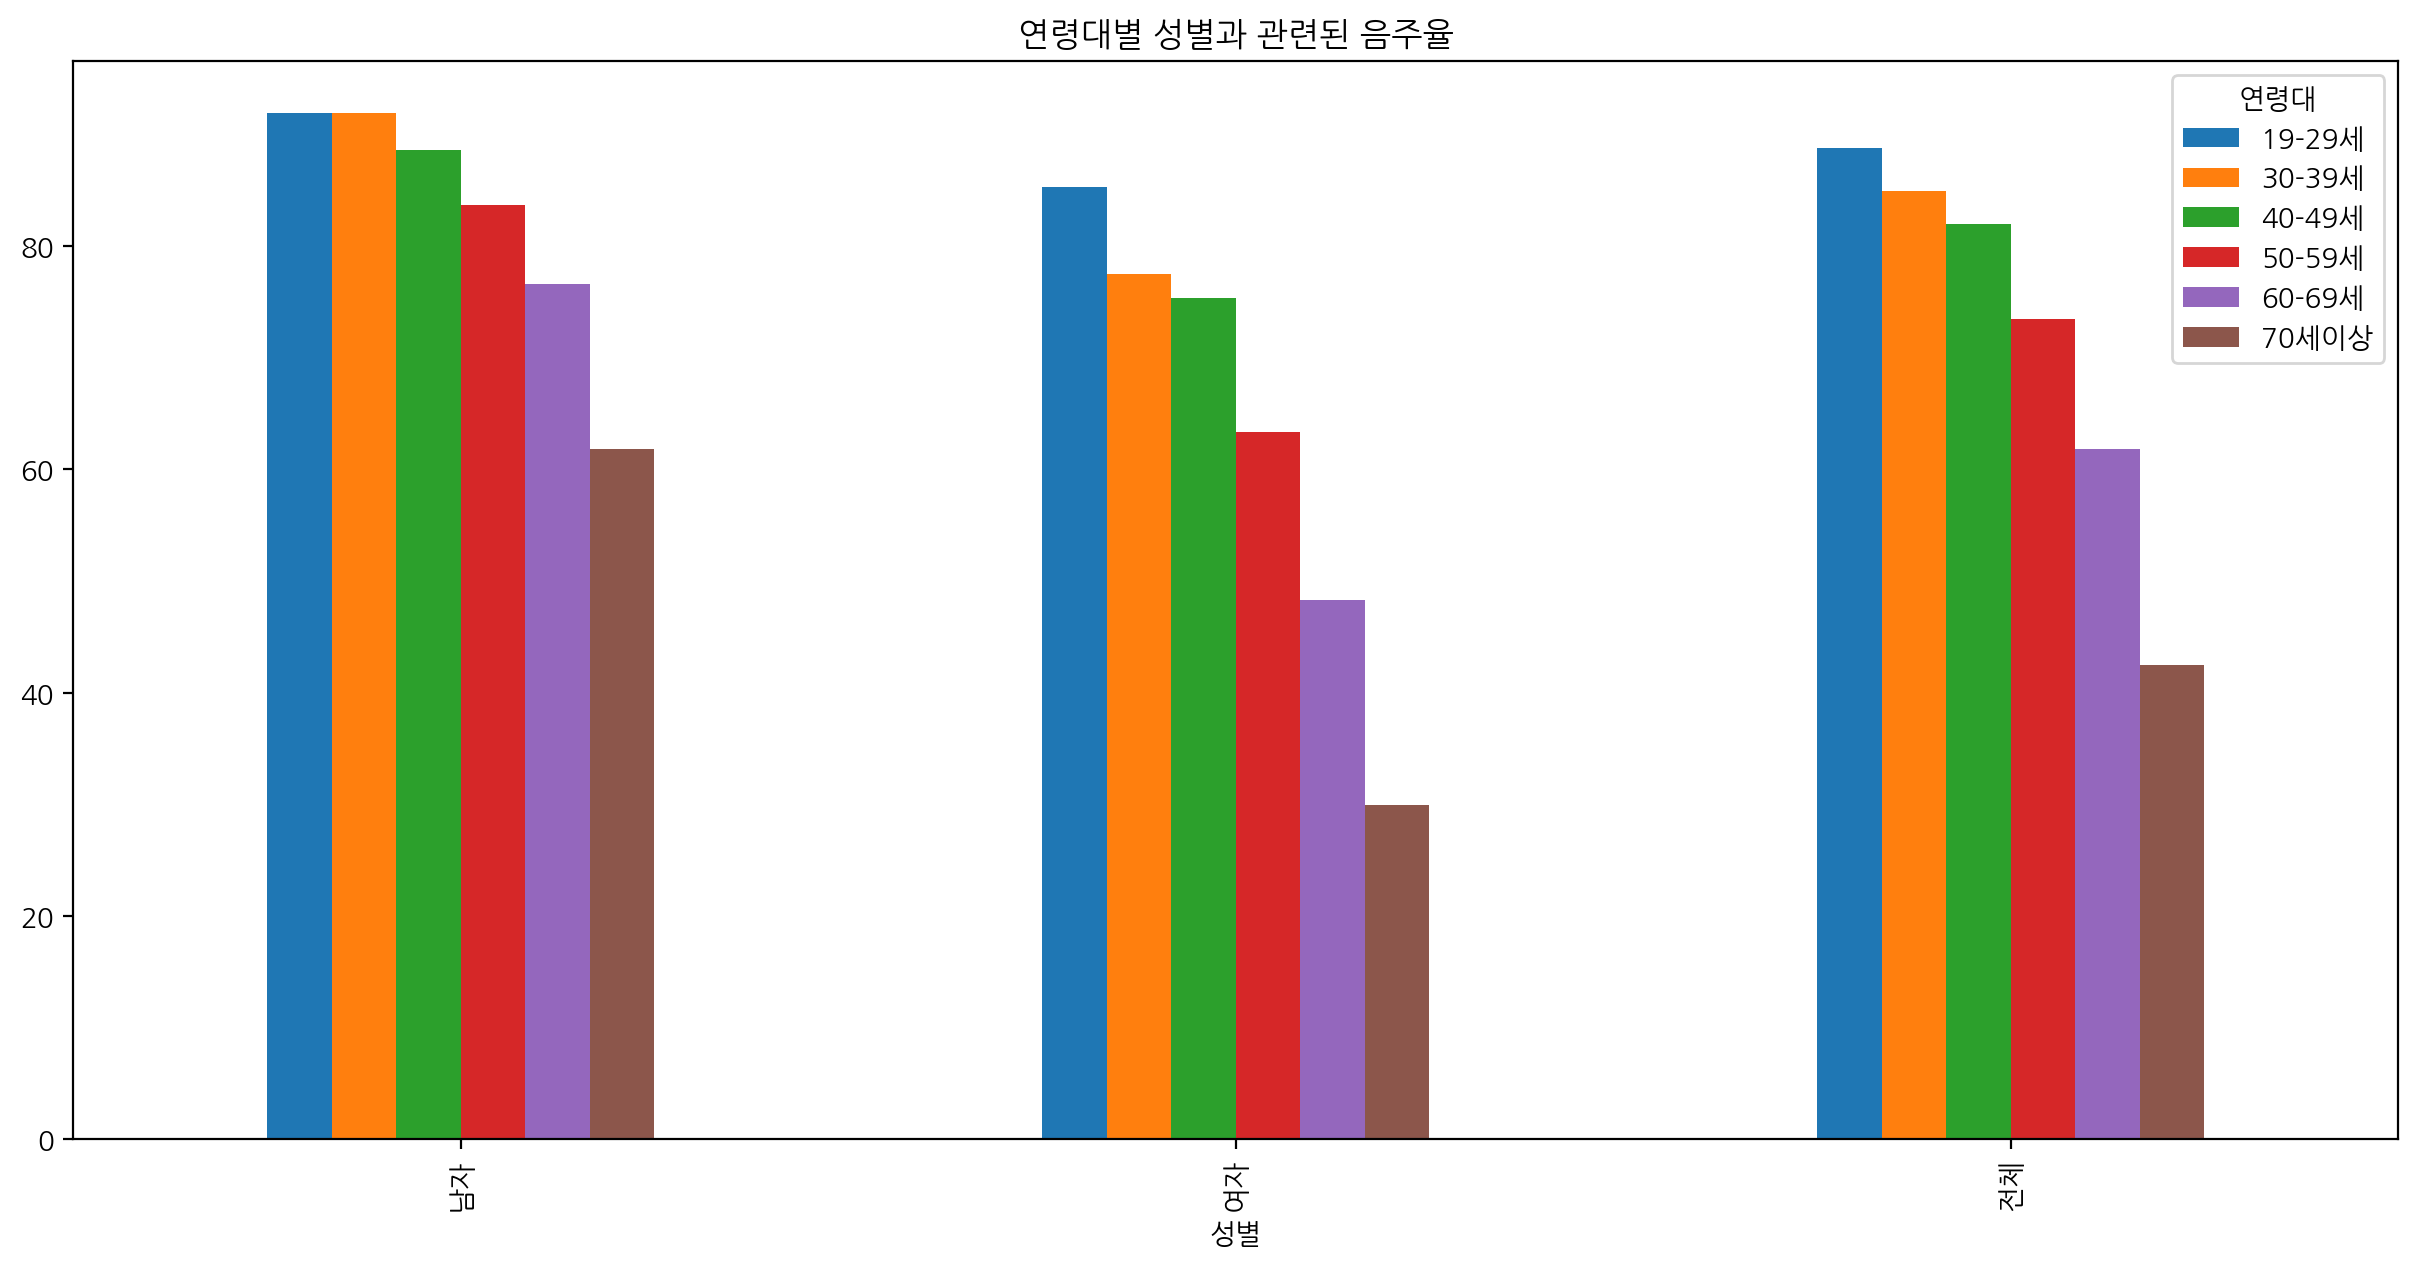

In [13]:
pd.pivot_table(data = df_me, index = "성별", columns = "연령대", values = "음주율").plot.bar(figsize = (15, 7), title = "연령대별 성별과 관련된 음주율");

In [18]:
px.histogram(df_me, x = "년도", y = "음주율", histfunc = "avg", color = "성별", facet_col = "연령대", facet_col_wrap = 2)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'avg',
              'hovertemplate': '성별=전체<br>연령대=19-29세<br>년도=%{x}<br>avg of 음주율=%{y}<extra></extra>',
              'legendgroup': '전체',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '전체',
              'offsetgroup': '전체',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                          '2015', '2016', '2017', '2018', '2019', '2020'], dtype=object),
              'xaxis': 'x5',
              'y': array([90.5, 85.3, 87.6, 89.4, 89. , 91.6, 88.4, 88. , 89.3, 89.2, 89.2, 89.3,
                          87.6, 89.8, 87.7]),
              'yaxis': 'y5'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'avg',
              'hovertemplate': '성별=전체<br>연령대=30-39세<br>년도=%{x}<br>avg of 음주율=%{y}<extra></extra>',
              'legendgroup': '전체',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '전체',
              'offsetgroup': '전체',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                          '2015', '2016', '2017', '2018', '2019', '2020'], dtype=object),
              'xaxis': 'x6',
              'y': array([86.1, 82.7, 84. , 83.3, 87.1, 86.5, 81.5, 84.7, 83.8, 83.2, 85.8, 87. ,
                          86.3, 85.8, 85.9]),
              'yaxis': 'y6'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'avg',
              'hovertemplate': '성별=전체<br>연령대=40-49세<br>년도=%{x}<br>avg of 음주율=%{y}<extra></extra>',
              'legendgroup': '전체',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '전체',
              'offsetgroup': '전체',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                          '2015', '2016', '2017', '2018', '2019', '2020'], dtype=object),
              'xaxis': 'x3',
              'y': array([82. , 79.1, 81.1, 82. , 83.4, 80.6, 81.5, 79. , 82.7, 82.9, 82.4, 85.3,
                          84.5, 82.6, 81.3]),
              'yaxis': 'y3'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'avg',
              'hovertemplate': '성별=전체<br>연령대=50-59세<br>년도=%{x}<br>avg of 음주율=%{y}<extra></extra>',
              'legendgroup': '전체',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '전체',
              'offsetgroup': '전체',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['2005', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                          '2015', '2016', '2017', '2018', '2019', '2020'], dtype=object),
              'xaxis': 'x4',
              'y': array([73.8, 71.8, 70.6, 70.8, 74.9, 74.4, 73.1, 73.6, 71. , 74.3, 76.5, 75.3,
                          75. , 73. , 74.7]),
              'yaxis': 'y4'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'avg',
              'hovertemplate': '성별=전체<br>연령대=60-69세<br>년도=%{x}<br>avg of 음주율=%{y}<extra></extra>',
              'legendgroup': '전체',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '전체',
              'offsetgroup': '전체',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['2005', '2007', '

<Figure size 3000x1000 with 0 Axes>

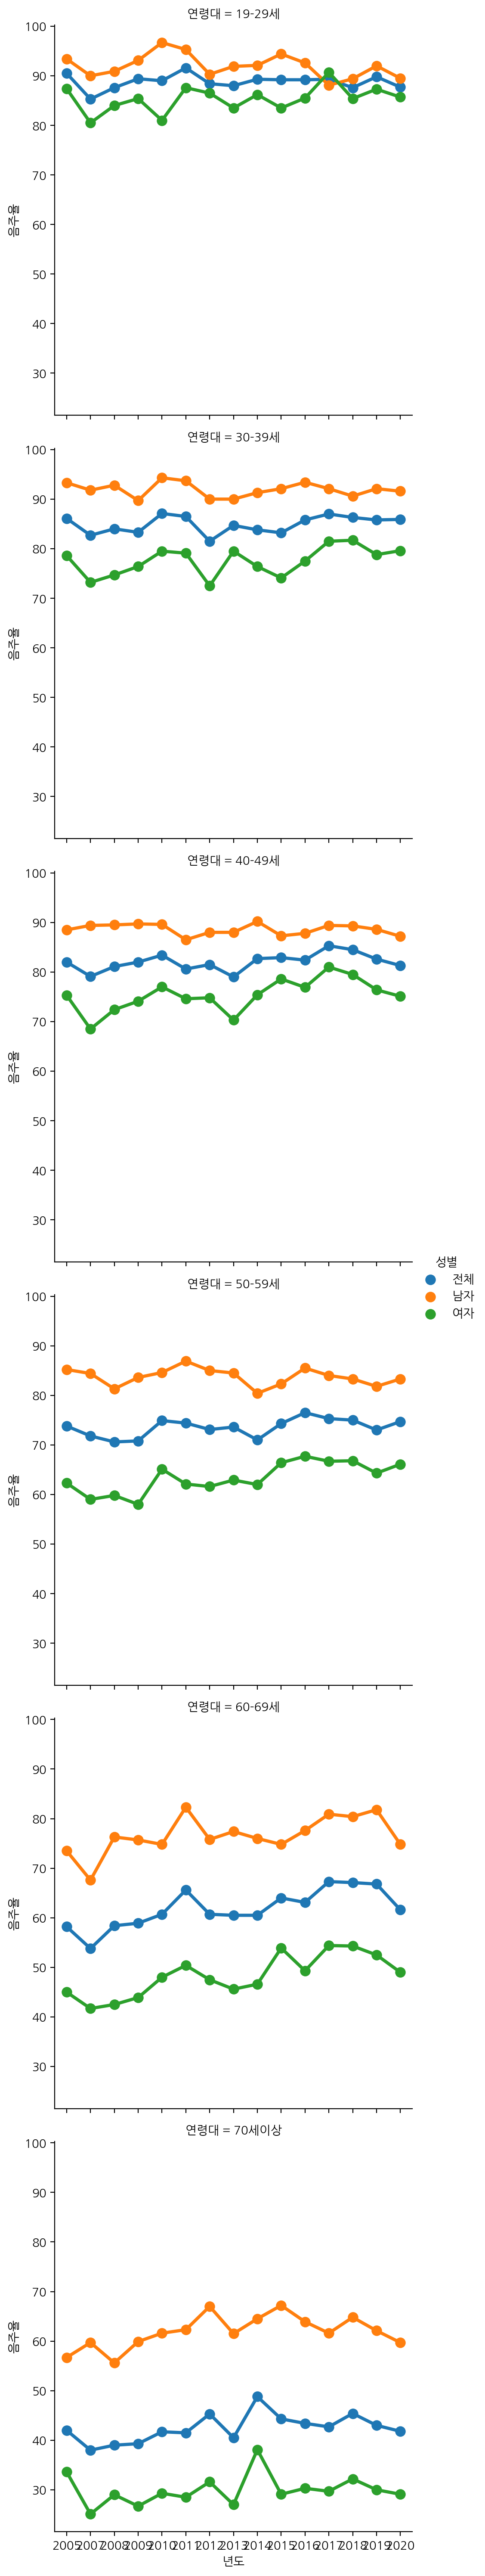

In [16]:
plt.figure(figsize=(30, 10))
sns.catplot(data = df_me, x = "년도", y = "음주율", col ="연령대", hue = "성별", col_wrap = 1, kind = "point", errorbar = None);